In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('../processed_data/calls_clean.csv')
df.sample(4)

,year,week,date,provincia,calls
34544,2014,10,2014-03-18,Cuneo,2
17808,2020,18,2020-05-12,Vicenza,3
30314,2016,5,2016-02-11,Verona,2
24243,2018,36,2018-09-16,Venezia,4


In [18]:
calls_by_week = df.groupby(['year', 'week'])['calls'].sum().reset_index()
pivoted_df = calls_by_week.pivot(index='year', columns='week', values='calls')
pivoted_df = pivoted_df.fillna(0).astype(int)
pivoted_df.columns = [f'{col + 1}' for col in pivoted_df.columns]
pivoted_df.reset_index(inplace=True)
pivoted_df.to_csv('../processed_data/calls_by_week.csv', index=False)

pivoted_df

,year,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2013,252,327,264,277,229,217,386,332,397,...,252,214,218,330,339,317,213,183,82,0
1,2014,112,220,225,220,183,202,215,210,177,...,235,226,186,280,198,195,207,124,72,0
2,2015,87,155,155,207,155,157,151,177,159,...,115,128,144,289,212,157,138,112,83,0
3,2016,22,161,146,127,126,165,137,178,150,...,96,139,171,230,192,201,146,116,130,0
4,2017,0,136,166,122,142,120,114,122,103,...,128,129,164,325,315,251,330,267,196,14
5,2018,173,170,240,239,211,197,192,190,181,...,138,121,177,319,252,217,145,167,56,0
6,2019,147,181,166,166,150,159,186,162,146,...,155,87,104,298,216,162,172,107,47,0
7,2020,96,107,115,118,134,161,161,189,134,...,227,289,253,668,379,360,327,203,169,0
8,2021,84,248,269,297,276,348,385,324,302,...,250,212,296,560,546,321,325,283,223,0
9,2022,22,263,203,263,242,252,237,215,201,...,184,207,254,369,345,431,336,247,287,0


### Making a heatmap of week percentages

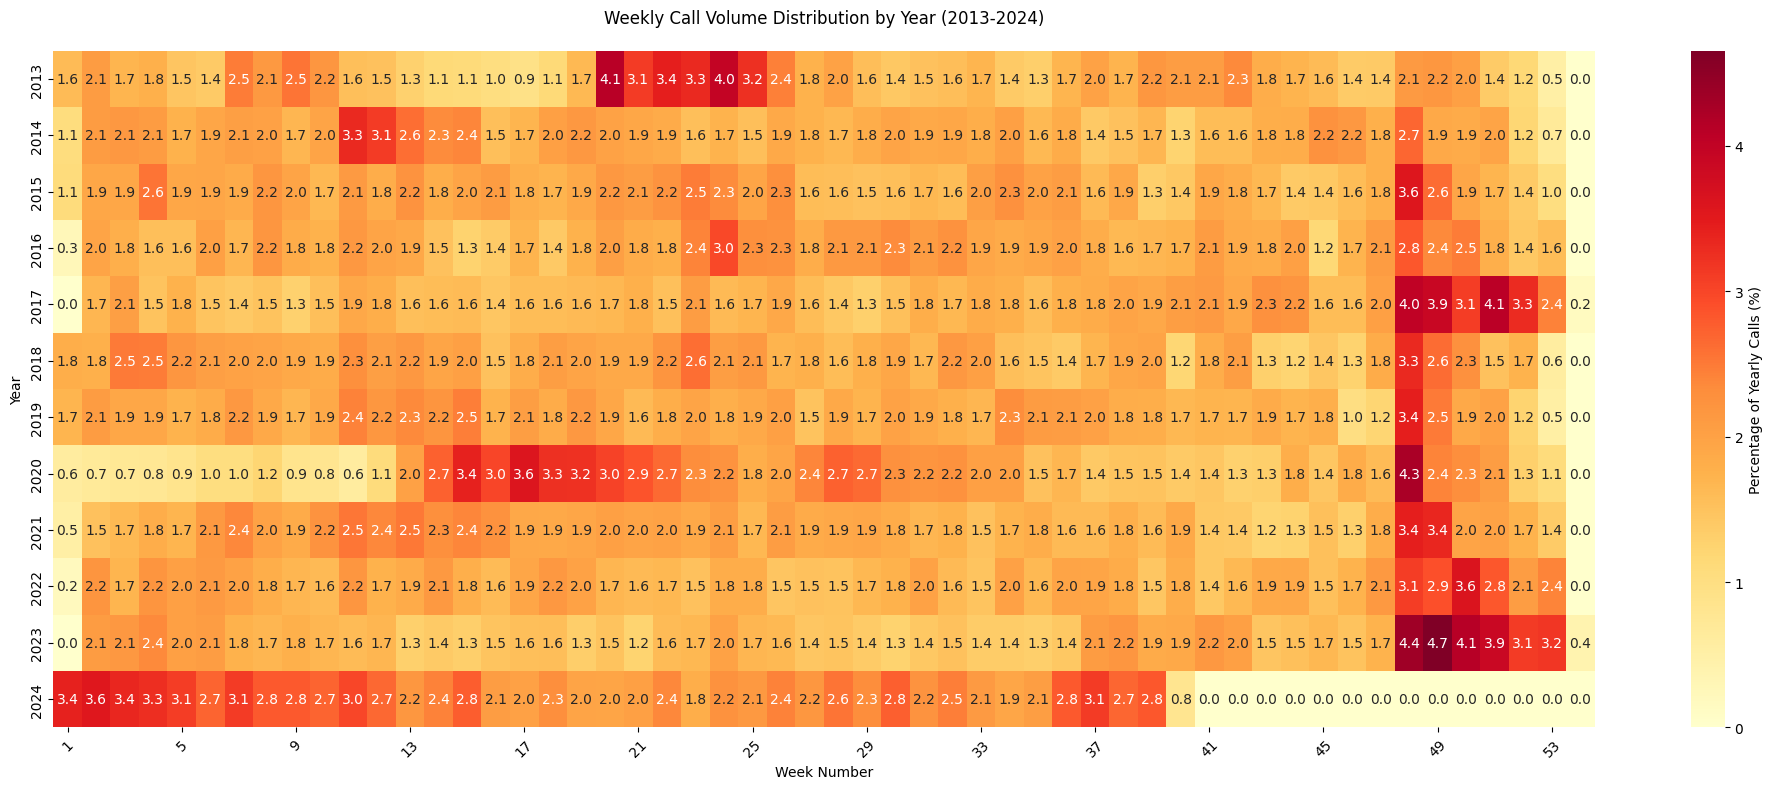

In [23]:
# Create a copy of the DataFrame for percentage calculations
percentage_df = pivoted_df.copy()

# Calculate percentages for each year (row)
for idx in percentage_df.index:
    year_total = percentage_df.loc[idx].sum()
    percentage_df.loc[idx] = (percentage_df.loc[idx] / year_total) * 100

# Create the figure and axis with a larger size
plt.figure(figsize=(20, 8))

# Create heatmap
sns.heatmap(percentage_df, 
            cmap='YlOrRd',  
            annot=True,     
            fmt='.1f',      # Show one decimal place for percentages
            cbar_kws={'label': 'Percentage of Yearly Calls (%)'},
            xticklabels=4,  
            yticklabels=True)

# Customize the plot
plt.title('Weekly Call Volume Distribution by Year (2013-2024)', pad=20)
plt.xlabel('Week Number')
plt.ylabel('Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig('../images/calls_heatmap_percentage.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [5]:
#totals by year
calls_by_year = df.groupby(['year'])['calls'].sum().reset_index()
calls_by_year


,year,calls
0,2013,15592
1,2014,10474
2,2015,8082
3,2016,8125
4,2017,8085
5,2018,9602
6,2019,8647
7,2020,15708
8,2021,16272
9,2022,11909


In [6]:
calls_by_year.to_csv('../processed_data/calls_by_year.csv', index=False)

## Some visualizations